In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
# Key R installations, for harmonic mean p-value package
import rpy2
import rpy2.robjects as robjects
import rpy2.robjects.packages as rpackages
from rpy2.robjects.vectors import StrVector, FloatVector

# Significance Threshold
ALPHA = 0.05

# uncomment for installing the first time
utils = rpackages.importr('utils')
utils.install_packages(StrVector(["harmonicmeanp"]))
hmp = rpackages.importr('harmonicmeanp')

harmonic_mean_p = robjects.r['p.hmp']
qharmonicmeanp = robjects.r['qharmonicmeanp']

--- Please select a CRAN mirror for use in this session ---
Secure CRAN mirrors 

 1: 0-Cloud [https]
 2: Australia (Canberra) [https]
 3: Australia (Melbourne 1) [https]
 4: Australia (Melbourne 2) [https]
 5: Australia (Perth) [https]
 6: Austria [https]
 7: Belgium (Brussels) [https]
 8: Brazil (PR) [https]
 9: Brazil (RJ) [https]
10: Brazil (SP 1) [https]
11: Brazil (SP 2) [https]
12: Bulgaria [https]
13: Canada (MB) [https]
14: Canada (ON 3) [https]
15: Chile (Santiago) [https]
16: China (Beijing 2) [https]
17: China (Beijing 3) [https]
18: China (Hefei) [https]
19: China (Hong Kong) [https]
20: China (Guangzhou) [https]
21: China (Lanzhou) [https]
22: China (Nanjing) [https]
23: China (Shanghai 2) [https]
24: China (Shenzhen) [https]
25: Colombia (Cali) [https]
26: Costa Rica [https]
27: Cyprus [https]
28: Czech Republic [https]
29: Denmark [https]
30: East Asia [https]
31: Ecuador (Cuenca) [https]
32: Ecuador (Quito) [https]
33: France (Lyon 1) [https]
34: France (Lyon 2) [https

Selection:  76


R[write to console]: trying URL 'https://cran.case.edu/src/contrib/harmonicmeanp_3.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 529605 bytes (517 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to consol

In [3]:
df = pd.read_csv("MM_Fluency_Data.csv", index_col=0)

In [4]:
df.head()

MM_01  MM_02  MM_05  MM_08  MM_10  MM_11  MM_13  MM_14  MM_15  \
Modes                                                                        
Baseline      7.75   3.12   9.81   2.27   2.12   1.91   6.29   5.70   3.96   
NF_final      3.55   2.01   4.58   1.00   0.50   1.74   5.06   3.36   3.55   
Raw voice     5.56   2.78   9.16   1.72   0.47   0.79   3.20   2.53   1.23   
Delay         4.28   1.39  11.66   1.96   1.83   0.32   0.98   2.45   2.93   
Pitch Shift   3.95   1.25  13.58   1.13   1.83   1.49   1.20   4.15   1.49   

             MM_16  MM_17  MM_18  MM_19  MM_20  MM_23  MM_24  
Modes                                                         
Baseline      3.21   6.13   2.53   3.34   7.28   3.07   7.43  
NF_final      3.02   3.62   2.43   2.99   5.90   1.38   3.70  
Raw voice     2.48   4.80   2.71   1.82   6.09   3.32   6.25  
Delay         1.45   3.96   2.11   1.72   8.33   1.47   3.76  
Pitch Shift   2.93   4.00   2.44   0.35   7.85   1.94   2.19

In [5]:
df_order = pd.read_csv("MM_taskinfo.csv")
df_order.head()

MM_01  Duration in s        MM_02  Duration in s.1      MM_05  \
0   Baseline            256     Baseline              343   Baseline   
1  Raw Voice             80    Raw Voice              163  Raw Voice   
2    Bubbles            106        Delay              188    Whisper   
3        Pop            108      Whisper              103     Reverb   
4      Delay            148  Pitch-Shift              113      Delay   

   Duration in s.2      MM_08  Duration in s.3      MM_10  Duration in s.4  \
0              582   Baseline              330   Baseline              319   
1              187  Raw Voice              102  Raw Voice               65   
2               85      Delay              163    Bubbles               74   
3              114         DJ               94     Retune               96   
4              284    Whisper              110    Harmony               57   

   ...      MM_18  Duration in s.11        MM_19  Duration in s.12      MM_20  \
0  ...   Baseline               388     Baseline               392   Baseline   
1  ...  Raw Voice                74    Raw Voice               179  Raw Voice   
2  ...     Reverb                81        Delay                97      Piano   
3  ...    Bubbles                86      Bubbles               108         DJ   
4  ...    Harmony               101  Pitch-Shift                65    Whisper   

   Duration in s.13      MM_23  Duration in s.14        MM_24  \
0               215   Baseline               288     Baseline   
1                62  Raw Voice                80    Raw Voice   
2                56     Retune                61      Bubbles   
3                66        Pop                98  Pitch-Shift   
4                68    Bubbles               155       Retune   

   Duration in s.15  
0               313  
1               115  
2               112  
3                76  
4               109  

[5 rows x 32 columns]

In [6]:
df.index.values

array(['Baseline', 'NF_final', 'Raw voice', 'Delay', 'Pitch Shift',
       'Bubbles', 'Pop', 'Retune', 'DJ', 'Piano', 'Harmony', 'Reverb',
       'Whisper'], dtype=object)

In [7]:
df_order.iloc[:, 0].values

array(['Baseline', 'Raw Voice', 'Bubbles', 'Pop', 'Delay', 'Retune',
       'Reverb', 'Pitch-shift', 'Piano', 'DJ', 'Whisper', 'Harmony',
       'No Feedback'], dtype=object)

In [8]:
remap = {'Raw Voice': 'Raw voice', 
         'Pitch-shift': 'Pitch Shift', 
         'Pitch-Shift': 'Pitch Shift', 
         'No Feedback': 'NF_final',
         'Bubble': 'Bubbles',
        }

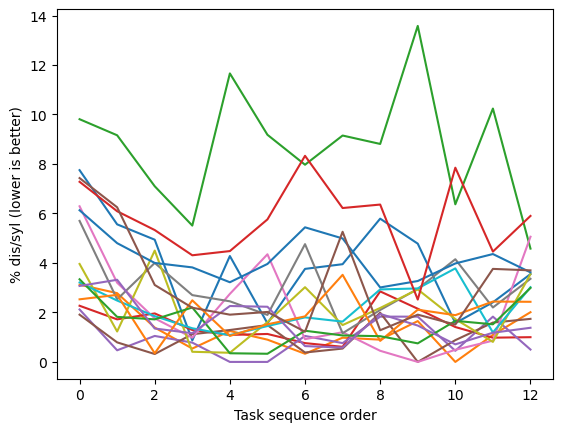

In [9]:
subj_in_task_order = []
for subj in df.columns:
    subj_values = df.loc[df_order.loc[:, subj].apply(lambda x: remap[x] if x in remap else x), [subj]].values
    subj_in_task_order.append(subj_values.tolist())
len(plt.plot(np.hstack(subj_in_task_order)))
plt.xlabel("Task sequence order")
plt.ylabel("% dis/syl (lower is better)");

/Users/satra/software/mambaforge/envs/mm/lib/python3.10/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


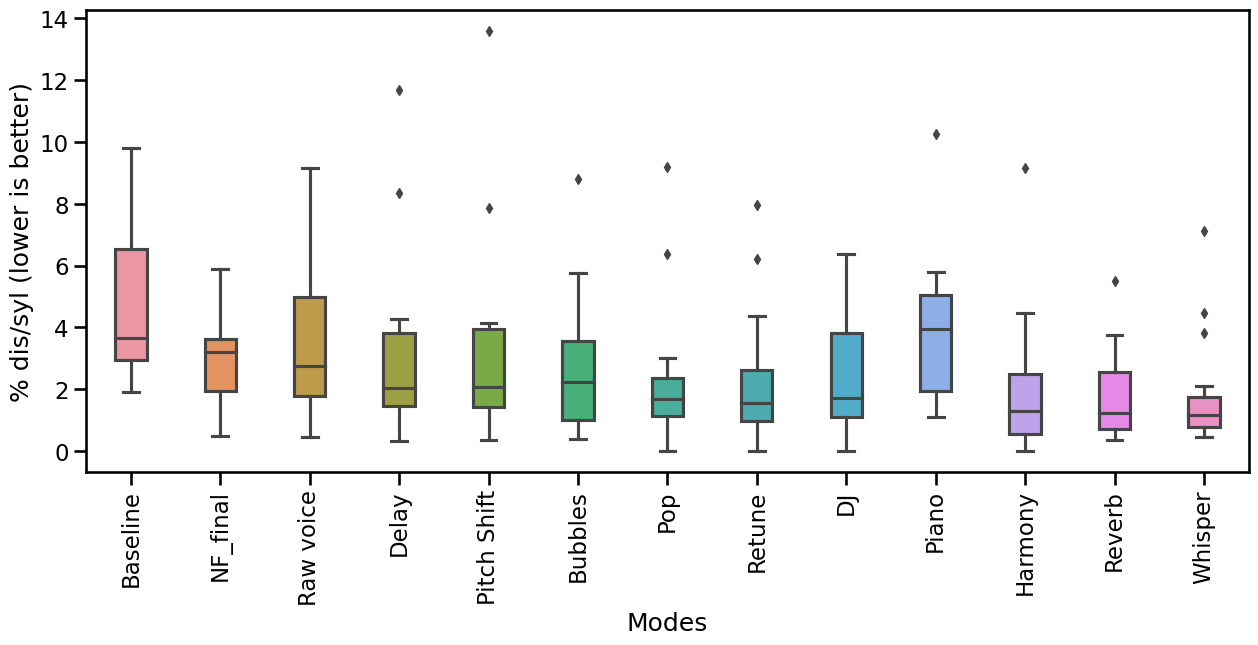

In [10]:
plt.figure(figsize=(15, 6))
sns.set_context('talk')
ax = sns.boxplot(data=df.T, width=0.35)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.ylabel("% dis/syl (lower is better)");

In [11]:
dfp = 100 * (df.loc["Baseline"] - df)/df.loc["Baseline"]
dfp.drop("Baseline", inplace=True)

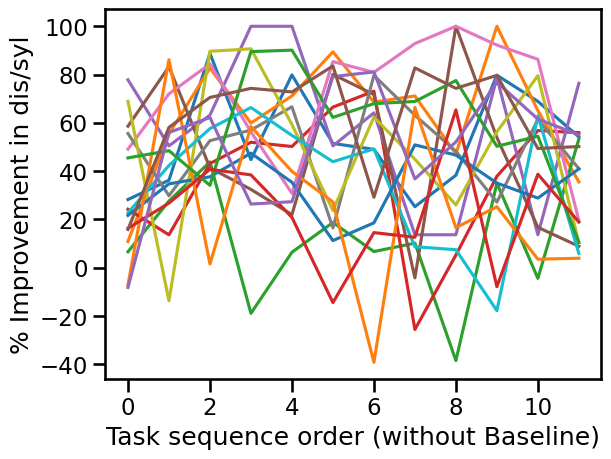

In [12]:
subj_in_task_order = []
def drop_baseline_remap(x):
    out = []
    for v in x:
        if v == "Baseline":
            continue
        if v in remap:
            out.append(remap[v])
        else:
            out.append(v)
    return out
        
for subj in df.columns:
    subj_values = dfp.loc[drop_baseline_remap(df_order.loc[:, subj].values), [subj]].values
    subj_in_task_order.append(subj_values.tolist())
plt.plot(np.hstack(subj_in_task_order))
plt.xlabel("Task sequence order (without Baseline)")
plt.ylabel("% Improvement in dis/syl");

/Users/satra/software/mambaforge/envs/mm/lib/python3.10/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]
/Users/satra/software/mambaforge/envs/mm/lib/python3.10/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:0.25'` for same effect.
  warnings.warn(msg, FutureWarning)


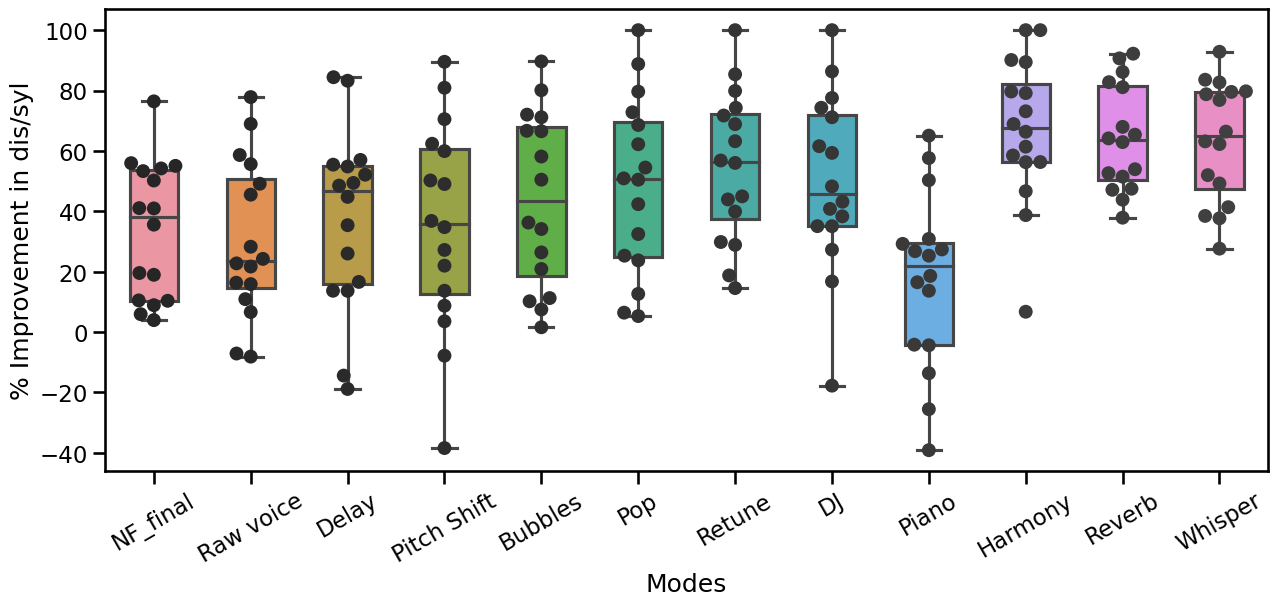

In [13]:
plt.figure(figsize=(15, 6))
sns.set_context('talk')
ax = sns.boxplot(data=dfp.T, width=0.5)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
ax = sns.swarmplot(data=dfp.T, color="0.25", size=10)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
# sns.lineplot(data=dfp, legend=False)
plt.ylabel("% Improvement in dis/syl");

In [14]:
import plotly.express as px
fig = px.parallel_coordinates(df.T, 
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=2)
fig.show()

/Users/satra/software/mambaforge/envs/mm/lib/python3.10/site-packages/plotly/express/_core.py:279: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  dims = [


In [15]:
import plotly.express as px
fig = px.parallel_coordinates(dfp.T, 
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=2)
fig.show()

/Users/satra/software/mambaforge/envs/mm/lib/python3.10/site-packages/plotly/express/_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



In [16]:
from scipy.stats import wilcoxon
import numpy as np

In [17]:
CONTROLS = ['Raw voice', 'Delay', 'Pitch Shift']
NON_FEEDBACK_MODES = ['Baseline', 'NF_final']

# Part 1: Mode Improvements over Baseline

In [18]:
no_nf_modes = df.index.drop(NON_FEEDBACK_MODES)

pvalues = np.nan * np.ones((1, len(no_nf_modes)))
pvalues = pvalues.astype(np.float64)

for idx, mode in enumerate(no_nf_modes):

    p = wilcoxon(df.loc['Baseline'], df.loc[mode], alternative="greater")
    pvalues[0, idx] = p.pvalue
    
pvaluedf_baseline = pd.DataFrame(pvalues, columns=no_nf_modes, index=["Baseline"])

In [19]:
pvaluedf_baseline

Modes     Raw voice     Delay  Pitch Shift   Bubbles       Pop    Retune  \
Baseline   0.000076  0.002579     0.003815  0.000015  0.000015  0.000015   

Modes           DJ     Piano   Harmony    Reverb   Whisper  
Baseline  0.000046  0.006546  0.000015  0.000015  0.000015

In [20]:
def calc_hmp(df, L=None, alpha=ALPHA):
    p_value_arr = [val for val in df.values.ravel() if not np.isnan(val)]
    L = L or len(p_value_arr)
    w = FloatVector([1/L] * len(p_value_arr))
    hmp = harmonic_mean_p(FloatVector(p_value_arr), w, L=L)[0]
    hmp = hmp/np.sum(w)
    if hmp < alpha:
        adj_p = [harmonic_mean_p(FloatVector([val]), 1/L, L=L)[0]/(1/L) for val in p_value_arr]
        adj_df = df.copy()
        adj_p_idx = [idx for idx,val in enumerate(df.values.ravel()) if not np.isnan(val)]
        adj_df.values.ravel()[adj_p_idx] = adj_p
    else:
        adj_df = None
    return hmp, adj_df

In [21]:
def style_df(pvaluedf, hmp, alpha=ALPHA):
    s = pvaluedf.style
    s.set_table_styles([  # create internal CSS classes
        {'selector': '.True', 'props': 'background-color: #e6ffe6;'},
        {'selector': '.False', 'props': 'background-color: #ffe6e6;'},
        {'selector': '.NaN', 'props': 'background-color: #000000;'},
    ], overwrite=False)
    cell_color = pd.DataFrame(((pvaluedf < ALPHA) & (hmp < ALPHA)).values.astype(str),
                              index=pvaluedf.index,
                              columns=pvaluedf.columns)
    cell_color[np.isnan(pvaluedf)] = "NaN"
    s.set_td_classes(cell_color)
    return s

In [22]:
L = pvaluedf_baseline.shape[1]
hmp, adj_p = calc_hmp(pvaluedf_baseline, L)
print(hmp)
style_df(adj_p, hmp)

2.5651275825497996e-05


### Test subsets of modes:

1. Delay and pitch shift
2. New modes

In [23]:
hmp, adj_p = calc_hmp(pvaluedf_baseline[['Delay', 'Pitch Shift']], L)
print(hmp)
style_df(adj_p, hmp)

0.018950362607662957


In [24]:
hmp, adj_p = calc_hmp(pvaluedf_baseline[['Bubbles', 'Pop', 'Retune', 'DJ', 'Piano', 'Harmony', 'Reverb', 'Whisper']], L)
print(hmp)
style_df(adj_p, hmp)

2.650143900270649e-05


# Part 1b: NF_Final Improvement over Baseline

In [25]:
pvalue = wilcoxon(df.loc['Baseline'], df.loc["NF_final"], alternative="greater").pvalue
print(f"NF Final has an Improvement over Baseline of significance: p = {pvalue}")

NF Final has an Improvement over Baseline of significance: p = 1.52587890625e-05


# Part 2: Mode Improvements over Controls

In [26]:
no_controls_or_non_feedback_modes = df.index.drop(NON_FEEDBACK_MODES + CONTROLS)

pvalues = np.nan * np.ones((len(CONTROLS), len(no_controls_or_non_feedback_modes)))
pvalues = pvalues.astype(np.float64)

for idx1, mode1 in enumerate(CONTROLS):
    for idx2, mode2 in enumerate(no_controls_or_non_feedback_modes):
        if mode1 == mode2:
            continue

        p21 = wilcoxon(df.loc[mode1], df.loc[mode2], alternative="greater")
        pvalues[idx1, idx2] = p21.pvalue

pvaluedf = pd.DataFrame(pvalues, columns=no_controls_or_non_feedback_modes, index=CONTROLS)

/Users/satra/software/mambaforge/envs/mm/lib/python3.10/site-packages/scipy/stats/_morestats.py:3255: UserWarning:

Exact p-value calculation does not work if there are zeros. Switching to normal approximation.



In [27]:
hmp, adj_p = calc_hmp(pvaluedf)
print(hmp)
style_df(adj_p, hmp)

0.0005507495425260461


### Now check each mode subset (i.e. each column)

In [28]:
hmp_vals = []
adj_ps = []
for mode in pvaluedf.columns:
    hmp, adj_p = calc_hmp(pvaluedf[[mode]].T, L=int(np.prod(pvaluedf.shape)-pvaluedf.shape[0]))
    if adj_p is not None:
        hmp_vals.append(hmp)
        adj_ps.append(adj_p)

In [29]:
style_df(pd.concat(adj_ps).T, (np.array(hmp_vals)[:,None]*np.ones((1, len(adj_ps[0])))).T)

# Part 3a: Improvements of Modes Relative to One Another (One-Sided Analysis)

### Checks if column mode is better than row mode

In [30]:
no_nf_modes = df.index.drop(NON_FEEDBACK_MODES)

pvalues = np.nan * np.ones((len(no_nf_modes), len(no_nf_modes)))
pvalues = pvalues.astype(np.float64)

for idx1, mode1 in enumerate(no_nf_modes):
    for idx2, mode2 in enumerate(no_nf_modes):
        if mode1 == mode2:
            continue

        p21 = wilcoxon(df.loc[mode1], df.loc[mode2], alternative="greater")
        pvalues[idx1, idx2] = p21.pvalue

pvaluedf = pd.DataFrame(pvalues, columns=no_nf_modes, index=no_nf_modes)

/Users/satra/software/mambaforge/envs/mm/lib/python3.10/site-packages/scipy/stats/_morestats.py:3255: UserWarning:

Exact p-value calculation does not work if there are zeros. Switching to normal approximation.



In [31]:
hmp, adj_p = calc_hmp(pvaluedf)
print(hmp)
style_df(adj_p, hmp)

0.0006454588599518469


### Now check each mode subset (i.e. each column)

In [32]:
hmp_vals = []
adj_ps = []
for mode in pvaluedf.columns:
    hmp, adj_p = calc_hmp(pvaluedf[[mode]].T, L=int(np.prod(pvaluedf.shape)-pvaluedf.shape[0]))
    if adj_p is not None:
        hmp_vals.append(hmp)
        adj_ps.append(adj_p)

In [33]:
style_df(pd.concat(adj_ps).T, (np.array(hmp_vals)[:,None]*np.ones((1, len(adj_ps[0])))).T)

# Part 3b: Improvements of Modes Relative to One Another (Two-Sided Analysis / Direction Agnostic)

In [34]:
no_nf_modes = df.index.drop(NON_FEEDBACK_MODES)

pvalues = np.nan * np.ones((len(no_nf_modes), len(no_nf_modes)))
pvalues = pvalues.astype(np.float64)

for idx1, mode1 in enumerate(no_nf_modes):
    for idx2, mode2 in enumerate(no_nf_modes):
        if idx1 >= idx2:
            continue

        p21 = wilcoxon(df.loc[mode1], df.loc[mode2], alternative="two-sided")
        pvalues[idx1, idx2] = p21.pvalue

pvaluedf = pd.DataFrame(pvalues, columns=no_nf_modes, index=no_nf_modes)

/Users/satra/software/mambaforge/envs/mm/lib/python3.10/site-packages/scipy/stats/_morestats.py:3255: UserWarning:

Exact p-value calculation does not work if there are zeros. Switching to normal approximation.



In [35]:
hmp, adj_p = calc_hmp(pvaluedf)
print(hmp)
style_df(adj_p, hmp)

0.0006454048535770218


In [36]:
no_nf_modes = df.index.drop(NON_FEEDBACK_MODES)

pvalues = np.nan * np.ones((len(no_nf_modes), len(no_nf_modes)))
pvalues = pvalues.astype(np.float64)

for idx1, mode1 in enumerate(no_nf_modes):
    for idx2, mode2 in enumerate(no_nf_modes):
        if mode1 == mode2:
            continue

        p21 = wilcoxon(df.loc[mode1], df.loc[mode2], alternative="two-sided")
        pvalues[idx1, idx2] = p21.pvalue

pvaluedf = pd.DataFrame(pvalues, columns=no_nf_modes, index=no_nf_modes)

/Users/satra/software/mambaforge/envs/mm/lib/python3.10/site-packages/scipy/stats/_morestats.py:3255: UserWarning:

Exact p-value calculation does not work if there are zeros. Switching to normal approximation.



### Now compute each subset (mode) accounting for a smaller overall set of p-values

In [37]:
hmp_vals = []
adj_ps = []
for mode in pvaluedf.columns:
    hmp, adj_p = calc_hmp(pvaluedf[[mode]].T, L=int(np.prod(pvaluedf.shape)-pvaluedf.shape[0])/2)
    if adj_p is not None:
        hmp_vals.append(hmp)
        adj_ps.append(adj_p)

### The plot should still be read as columns with hmp below alpha are shown.

The green cells are then adjusted p-values less than alpha

In [38]:
style_df(pd.concat(adj_ps).T, (np.array(hmp_vals)[:,None]*np.ones((1, len(adj_ps[0])))).T)